# Import Library


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Data From Local File
application_train=pd.read_csv("/content/drive/MyDrive/Data/home-credit-default-risk/application_train.csv",sep=',')
POS_CASH_balance=pd.read_csv("/content/drive/MyDrive/Data/home-credit-default-risk/POS_CASH_balance.csv",sep=',')
bureau_balance=pd.read_csv("/content/drive/MyDrive/Data/home-credit-default-risk/bureau_balance.csv",sep=',')
previous_application=pd.read_csv("/content/drive/MyDrive/Data/home-credit-default-risk/previous_application.csv",sep=',')
installments_payments=pd.read_csv("/content/drive/MyDrive/Data/home-credit-default-risk/installments_payments.csv",sep=',')
credit_card_balance=pd.read_csv("/content/drive/MyDrive/Data/home-credit-default-risk/credit_card_balance.csv",sep=',')
bureau=pd.read_csv("/content/drive/MyDrive/Data/home-credit-default-risk/bureau.csv",sep=',')
application_test=pd.read_csv("/content/drive/MyDrive/Data/home-credit-default-risk/application_test.csv",sep=',')

In [ ]:
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


# About Data

In [ ]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [ ]:
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [ ]:
bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [ ]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [ ]:
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [ ]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [ ]:
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

# Preprocessing Data

In [ ]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in application_train.columns:
    # Count the number of missing values
    missing_values = application_train[col].isnull().sum()

    # Count the number of duplicates based on SK_ID_CURR
    duplicates = application_train.duplicated(subset=['SK_ID_CURR', col]).sum()

    # Check for outliers (assuming a normal distribution)
    if application_train[col].dtype in ['int64', 'float64']:
        mean = application_train[col].mean()
        std = application_train[col].std()
        outliers = ((application_train[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+------------------------------+----------------+------------+----------+
|           Variable           | Missing Values | Duplicates | Outliers |
+------------------------------+----------------+------------+----------+
|          SK_ID_CURR          |       0        |     0      |    0     |
|            TARGET            |       0        |     0      |  24825   |
|      NAME_CONTRACT_TYPE      |       0        |     0      |   N/A    |
|         CODE_GENDER          |       0        |     0      |   N/A    |
|         FLAG_OWN_CAR         |       0        |     0      |   N/A    |
|       FLAG_OWN_REALTY        |       0        |     0      |   N/A    |
|         CNT_CHILDREN         |       0        |     0      |   4272   |
|       AMT_INCOME_TOTAL       |       0        |     0      |   454    |
|          AMT_CREDIT          |       0        |     0      |   3255   |
|         AMT_ANNUITY          |       0        |     0      |   2959   |
|       AMT_GOODS_PRICE        |      

## Checking Missing Values

**checking missing values in application_train**

In [ ]:
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


**checking missing values in POS_CASH_balance**

In [ ]:
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_PREV,0,0.000000


**checking missing values in bureau_balance**

In [ ]:
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(3)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**checking missing values in previous_application**

In [ ]:
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


**checking missing values in installments_payments**

In [ ]:
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(3)

,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000


**checking missing values in credit_card_balance**

In [ ]:
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


**checking missing values in bureau**

In [ ]:
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000


## Handling Missing Values

In [4]:
#o view the columns that have missing values more than 50%
missing_percentage = application_train.isnull().mean()
columns_with_missing_values = missing_percentage[missing_percentage > 0.5].index
print("Columns with missing values more than 50%:")
print(columns_with_missing_values)

Columns with missing values more than 50%:
Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')


In [5]:
#o view the columns that have missing values more than 50%
missing_percentage = application_test.isnull().mean()
columns_with_missing_values = missing_percentage[missing_percentage > 0.5].index
print("Columns with missing values more than 50%:")
print(columns_with_missing_values)

Columns with missing values more than 50%:
Index(['OWN_CAR_AGE', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE'],
      dtype='object')


In [6]:
def handle_missing_values(df):
    # Drop columns with missing values more than 50%
    missing_percentage = df.isnull().mean()
    columns_to_drop = missing_percentage[missing_percentage > 0.5].index
    df = df.drop(columns_to_drop, axis=1)

    # Fill missing numeric values with the mean
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # Fill missing categorical values with a placeholder value
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('Unknown')

    return df

In [7]:
# Handling missing values
application_train = handle_missing_values(application_train)
bureau = handle_missing_values(bureau)
bureau_balance = handle_missing_values(bureau_balance)
POS_CASH_balance = handle_missing_values(POS_CASH_balance)
credit_card_balance = handle_missing_values(credit_card_balance)
previous_application = handle_missing_values(previous_application)
installments_payments = handle_missing_values(installments_payments)

## Inconsistancies Data

In [8]:
# Remove outliers
application_train = application_train[(application_train['AMT_INCOME_TOTAL'] <= 5000000) & (application_train['AMT_CREDIT'] <= 5000000)]

# Correct inconsistencies
application_train['CODE_GENDER'] = application_train['CODE_GENDER'].replace('XNA', 'F')

<ipython-input-8-625abbee1961>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_train['CODE_GENDER'] = application_train['CODE_GENDER'].replace('XNA', 'F')


## Checking Duplicate Data

In [ ]:
application_train.duplicated().sum()

0

# Data Exploration

<Figure size 1000x600 with 0 Axes>

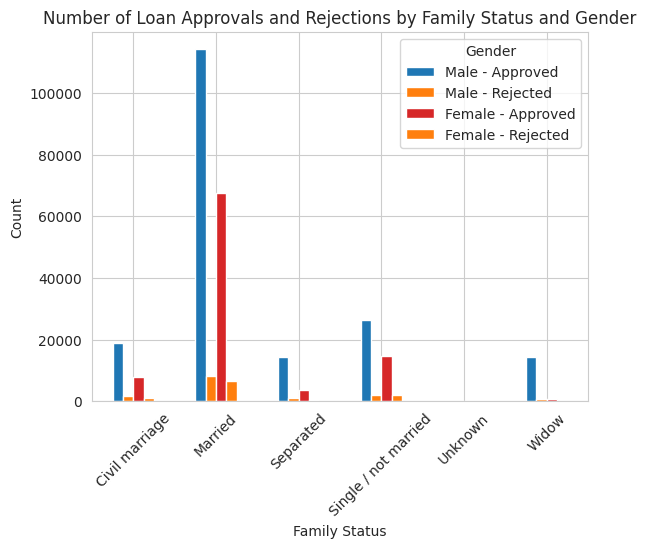

In [ ]:
# create pivot table to count number of loan approvals and rejections by family status and gender
pivot_table = application_train.pivot_table(index=['NAME_FAMILY_STATUS'], columns=['CODE_GENDER', 'TARGET'], values='SK_ID_CURR', aggfunc='count')
pivot_table.columns = pivot_table.columns.map(lambda x: f"{x[0]}_{x[1]}")

# create stacked bar chart using pivot table
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = pivot_table.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#d62728', '#ff7f0e'])
ax.set_xlabel('Family Status')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections by Family Status and Gender')

# change legend labels
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male - Approved', 'Male - Rejected', 'Female - Approved', 'Female - Rejected'])
plt.show()

# Feature Engineering

In [ ]:
application_train['CREDIT_INCOME_PERCENT'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_train['ANNUITY_INCOME_PERCENT'] = application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_TERM'] = application_train['AMT_ANNUITY'] / application_train['AMT_CREDIT']
application_train['DAYS_EMPLOYED_PERCENT'] = application_train['DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']
application_test['CREDIT_INCOME_PERCENT'] = application_test['AMT_CREDIT'] / application_test['AMT_INCOME_TOTAL']
application_test['ANNUITY_INCOME_PERCENT'] = application_test['AMT_ANNUITY'] / application_test['AMT_INCOME_TOTAL']
application_test['CREDIT_TERM'] = application_test['AMT_ANNUITY'] / application_test['AMT_CREDIT']
application_test['DAYS_EMPLOYED_PERCENT'] = application_test['DAYS_EMPLOYED'] / application_test['DAYS_BIRTH']

# Exploratory Data Analysis (EDA)

**statistics descriptive**

In [ ]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
count,307506.000000,307506.000000,307506.000000,3.075060e+05,3.075060e+05,307506.000000,3.075060e+05,307506.000000,307506.000000,307506.000000,...,307506.000000,307506.00000,307506.000000,307506.000000,307506.000000,307506.000000,307506.000000,307506.000000,307506.000000,307506.000000
mean,278180.882376,0.080727,0.417049,1.682665e+05,5.990199e+05,27107.674829,5.383902e+05,0.020868,-16037.003356,63816.132573,...,0.006403,0.00700,0.034359,0.267398,0.265477,1.899977,3.957633,0.180932,0.053695,-2.920185
std,102790.220381,0.272416,0.722120,9.916463e+04,4.024885e+05,14490.839110,3.692761e+05,0.013831,4364.013280,141276.657448,...,0.077984,0.10301,0.190360,0.851930,0.738513,1.738534,2.689705,0.094571,0.022482,6.627140
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.066667,0.003333,0.018277,-47.489663
25%,189145.250000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2.018667,0.114786,0.036900,0.021558
50%,278202.500000,0.000000,0.000000,1.470735e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.500000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.899974,3.265067,0.162833,0.050000,0.088645
75%,367142.750000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.00000,0.000000,0.267395,0.265474,3.000000,5.159923,0.229067,0.064043,0.190999
max,456255.000000,1.000000,19.000000,4.500000e+06,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,4.000000,9.00000,8.000000,27.000000,261.000000,25.000000,84.736842,1.875965,0.172118,0.728811


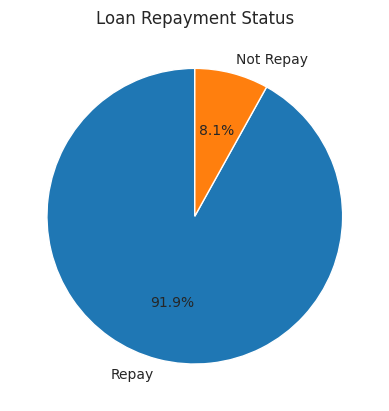

In [ ]:
# Get counts of target values
target_counts = application_train['TARGET'].value_counts()

# Create figure and axis objects
fig, ax = plt.subplots()

# Create pie chart
labels = ['Repay', 'Not Repay']
pie = ax.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
ax.set_title('Loan Repayment Status')

# Show chart
plt.show()

as we can see, data is highly imbalanced

## Correlation

In [ ]:
numeric_columns = application_train.select_dtypes(include=['float', 'integer']).columns
correlation_matrix = application_train[numeric_columns].corr()

<ipython-input-12-fa119c9b42b0>:21: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  correlation_matrix_pd.loc[top_correlation_cols, top_correlation_cols],


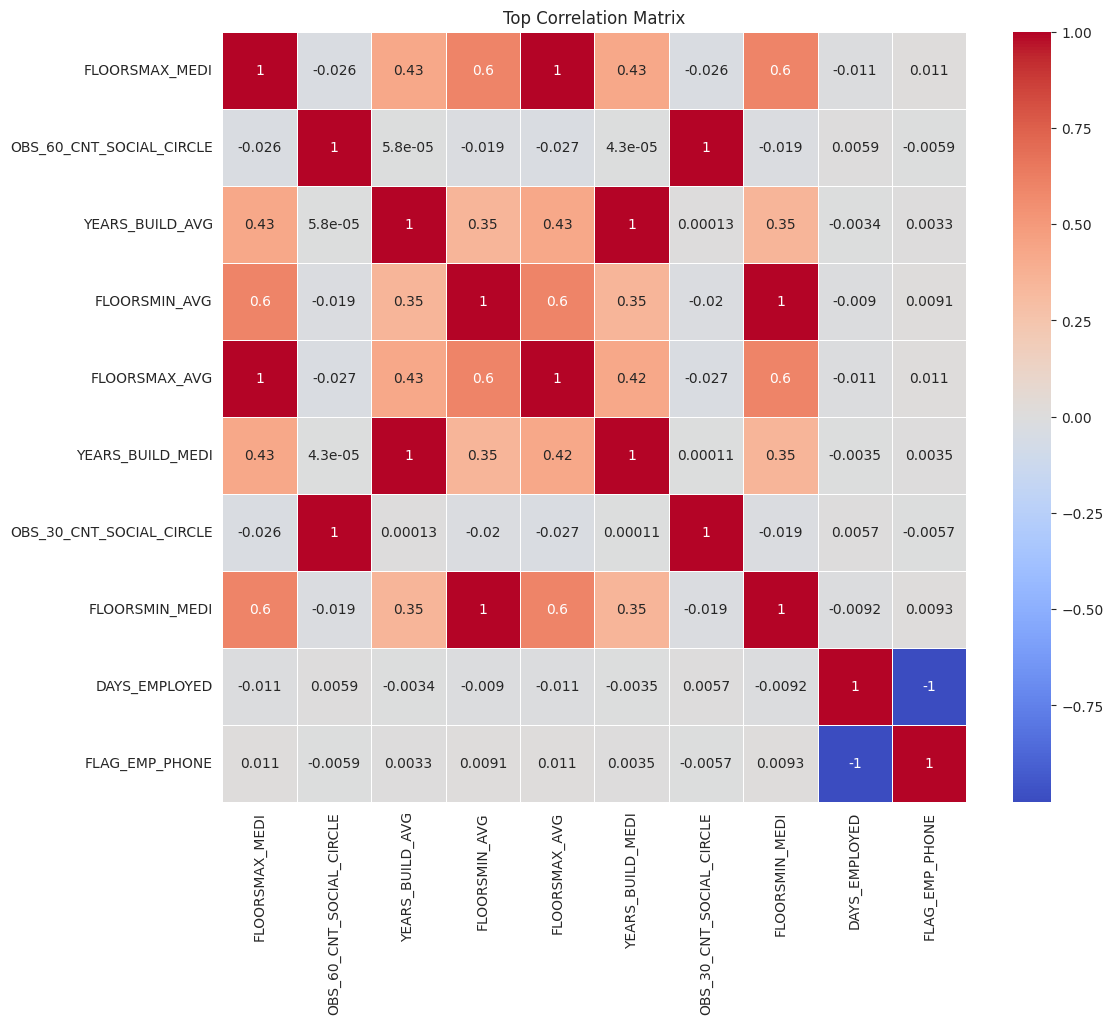

In [ ]:
# Convert correlation matrix to Pandas DataFrame
correlation_matrix_pd = pd.DataFrame(correlation_matrix)

# Set the number of top correlations to display
num_top_correlations = 10

# Get the top absolute correlations
top_correlations = correlation_matrix_pd.abs().unstack().sort_values(ascending=False)
top_correlations = top_correlations[top_correlations != 1.0]  # Exclude self-correlations
top_correlations = top_correlations[:num_top_correlations]

# Get the corresponding columns
top_correlation_cols = set()
for col1, col2 in top_correlations.index:
    top_correlation_cols.add(col1)
    top_correlation_cols.add(col2)

# Plot correlation matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix_pd.loc[top_correlation_cols, top_correlation_cols],
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Top Correlation Matrix')
plt.show()

## Distribution of Top 10 Features

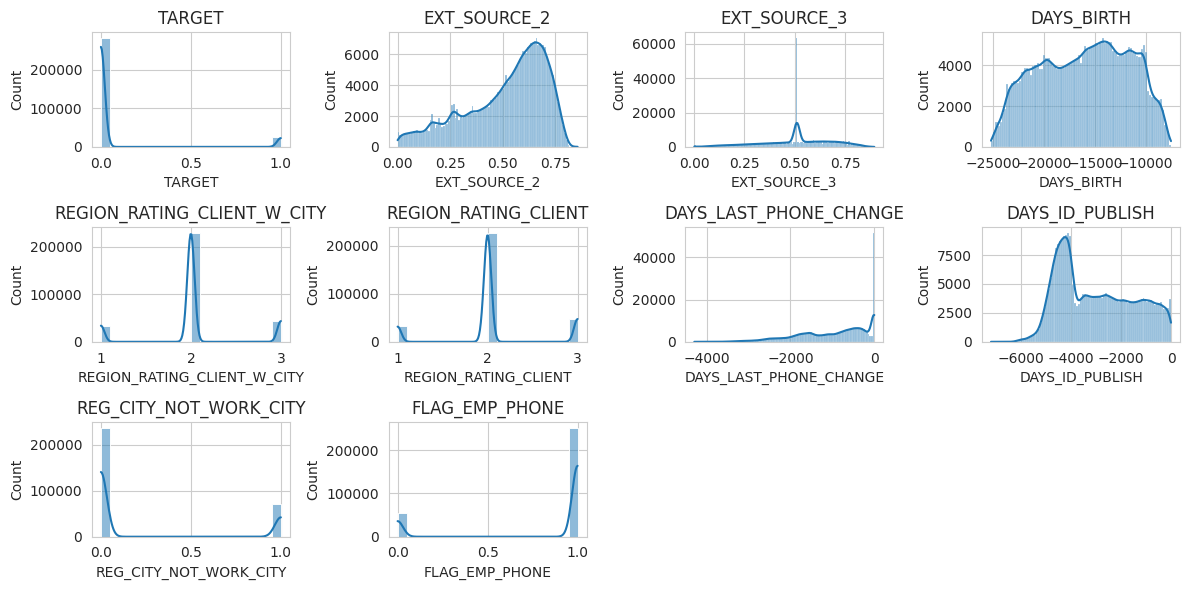

In [ ]:
# Filter numeric columns (excluding object data types)
numeric_columns = application_train.select_dtypes(include=['float', 'integer']).columns

# Sort numeric features based on a specific criterion (e.g., correlation with the target variable)
numeric_features_sorted = application_train[numeric_columns].corr()['TARGET'].abs().sort_values(ascending=False)
top_numeric_features = numeric_features_sorted.index[:10]  # Select top 10 numeric features

# Convert the DataFrame to a Pandas DataFrame
application_train_pd = pd.DataFrame(application_train)

# Convert the StringIndex to a regular Python list
top_numeric_features = top_numeric_features.tolist()

# Calculate the number of rows and columns for subplots
num_numeric_cols = len(top_numeric_features)
num_rows = math.ceil(num_numeric_cols / 4)
num_cols = min(num_numeric_cols, 4)

# Plot distribution of top 10 numeric features
plt.figure(figsize=(12, 6))
for i, column in enumerate(top_numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(application_train_pd[column].dropna(), kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


##Countplot of Categorical Features

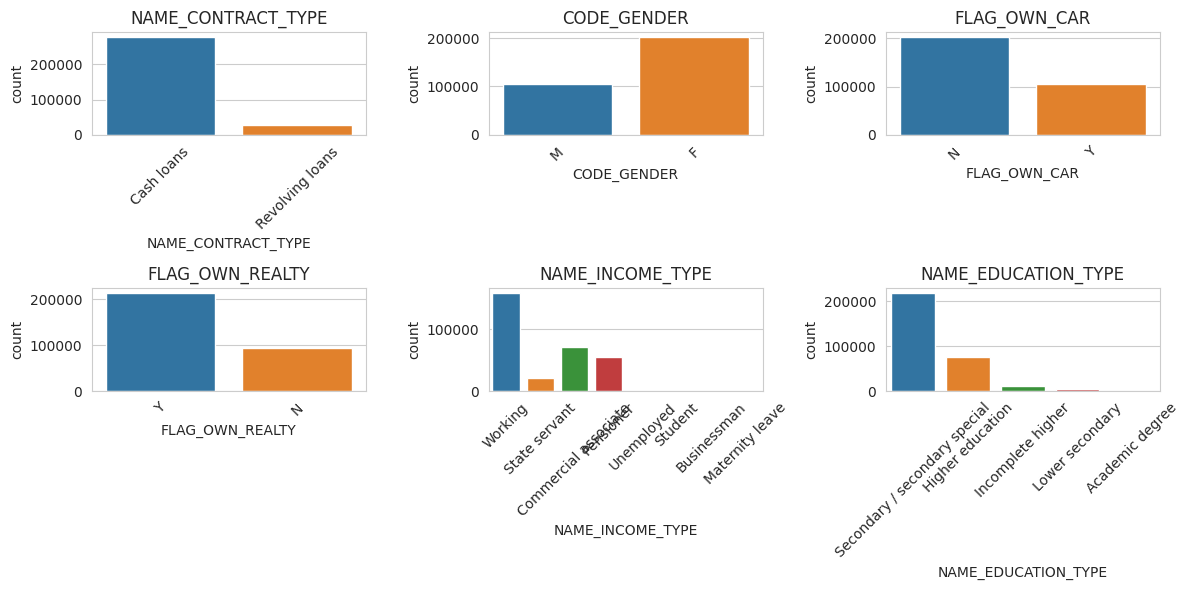

In [ ]:
# Convert the categorical_columns to a regular Python list
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

# Calculate the number of rows and columns for subplots
num_categorical_cols = len(categorical_columns)
num_rows = math.ceil(num_categorical_cols / 3)
num_cols = min(num_categorical_cols, 3)

# Plot countplot of categorical features
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=application_train_pd, x=column)
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Boxplot of Numerical Features

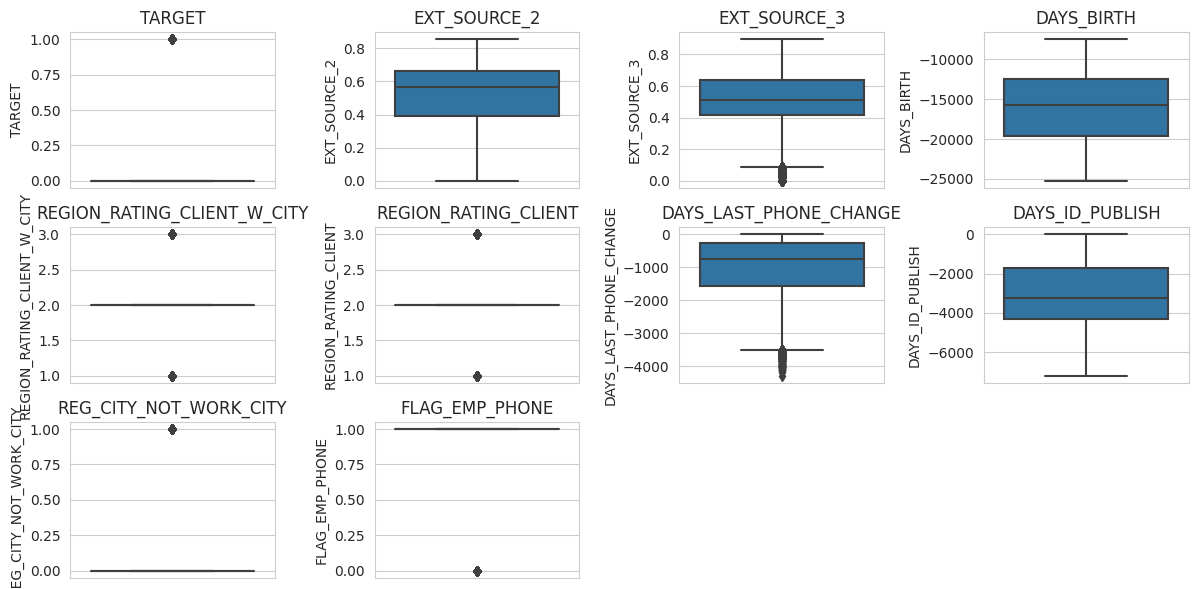

In [ ]:
# Filter numeric columns (excluding object data types)
numeric_columns = application_train.select_dtypes(include=['float', 'integer']).columns

# Sort numeric features based on a specific criterion (e.g., correlation with the target variable)
numeric_features_sorted = application_train[numeric_columns].corr()['TARGET'].abs().sort_values(ascending=False)
top_numeric_features = numeric_features_sorted.index[:10]  # Select top 10 numeric features

# Calculate the number of rows and columns for subplots
num_numeric_cols = len(top_numeric_features)
num_rows = math.ceil(num_numeric_cols / 4)
num_cols = min(num_numeric_cols, 4)

# Plot boxplot of top 10 numeric features
plt.figure(figsize=(12, 6))
for i, column in enumerate(top_numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=application_train, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

## Pairplot of selected numerical features

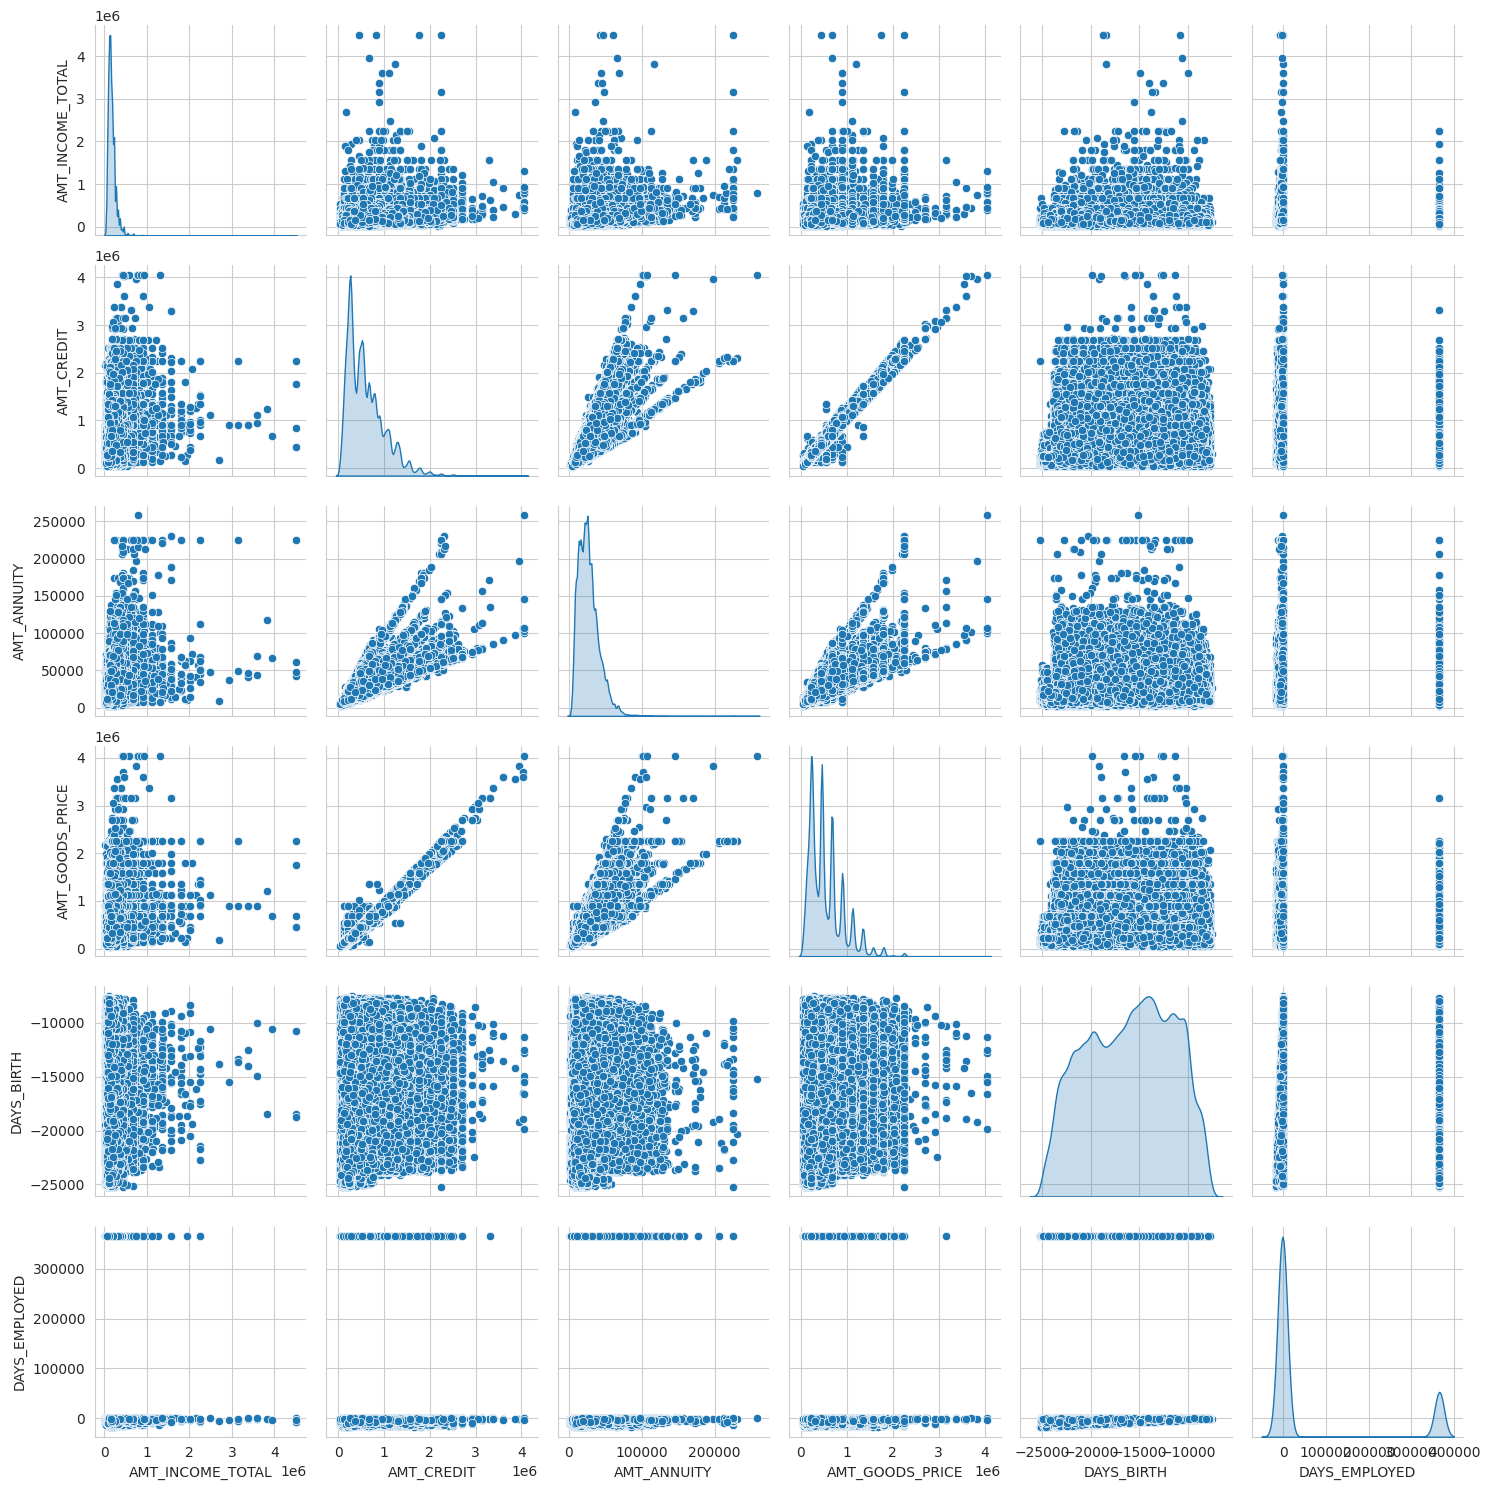

In [ ]:
selected_numeric_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
sns.pairplot(data=application_train_pd[selected_numeric_columns].dropna(), diag_kind='kde')
plt.tight_layout()
plt.show()

# Encoding Features

In [9]:
X = application_train.drop('TARGET', axis=1)
y = application_train['TARGET']

**categorical to dummy**

In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = X[column].fillna('').astype('str')
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])

**standarization**

In [11]:
from sklearn.preprocessing import StandardScaler

numeric_columns = X.select_dtypes(include=['float']).columns
for column in numeric_columns:
    X[column] = X[column].fillna(0)
    scaler = StandardScaler()
    X[column] = scaler.fit_transform(X[column].values.reshape(-1, 1))

# Splitting Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Models with Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Perform K-fold cross-validation
k = 3  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Define the models
models = [
    LogisticRegression(),
    RandomForestClassifier(n_estimators=100, max_depth=8),
]

# Store accuracy for each model
model_accuracy = {}

# Train and evaluate models for each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"Fold {fold + 1}:")
    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_name = model.__class__.__name__
        if model_name not in model_accuracy:
            model_accuracy[model_name] = []
        model_accuracy[model_name].append(accuracy)
        elapsed_time = time.time() - start_time
        print(f"  Model: {model_name}, Accuracy: {accuracy}, Time taken: {elapsed_time:.2f} seconds")


Fold 1:
  Model: LogisticRegression, Accuracy: 0.9194454742346491, Time taken: 3.99 seconds
  Model: RandomForestClassifier, Accuracy: 0.9194454742346491, Time taken: 48.87 seconds
Fold 2:
  Model: LogisticRegression, Accuracy: 0.919143041111393, Time taken: 1.96 seconds
  Model: RandomForestClassifier, Accuracy: 0.919143041111393, Time taken: 46.03 seconds
Fold 3:
  Model: LogisticRegression, Accuracy: 0.9192308442762093, Time taken: 2.56 seconds
  Model: RandomForestClassifier, Accuracy: 0.9192308442762093, Time taken: 45.42 seconds


In [ ]:
model_names = list(model_accuracy.keys())
accuracies = list(model_accuracy.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, np.mean(accuracies, axis=1))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
plt.xticks(rotation=45)

# Print accuracy over each bar
for i, acc in enumerate(np.mean(accuracies, axis=1)):
    plt.text(i, acc, f"{acc:.16f}", ha="center", va="bottom")

plt.show()

NameError: ignored

In [ ]:
best_model_index = np.argmax(np.mean(accuracies, axis=1))
best_model = models[best_model_index]
print(f"The best model is {best_model} with an average accuracy of {np.mean(accuracies[best_model_index])}.")

The best model is LogisticRegression() with an average accuracy of 0.9192731198740837.


# Tuning Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'n_estimators': [100, 200, 300],  # Number of trees in the forest
#    'max_depth': [None, 5, 10],  # Maximum depth of the trees
#    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
#}


# Define the parameter grid
param_grid = {
    'n_estimators': [100,300],  # Number of trees in the forest
    'max_depth': [None,10],  # Maximum depth of the trees
    'min_samples_split': [5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2]  # Minimum number of samples required to be at a leaf node
}

# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search_rv = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search_rv.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters: ", grid_search_rv.best_params_)
print("Best Accuracy: ", grid_search_rv.best_score_)
print(grid_search_rv.best_score_)

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy:  0.9193834249214806
0.9193834249214806


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.919359034826301


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
best_model = grid_search.best_estimator_
print(best_model)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')


# Features Importances

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model using scikit-learn
model_sklearn_rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=2)
model_sklearn_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5)

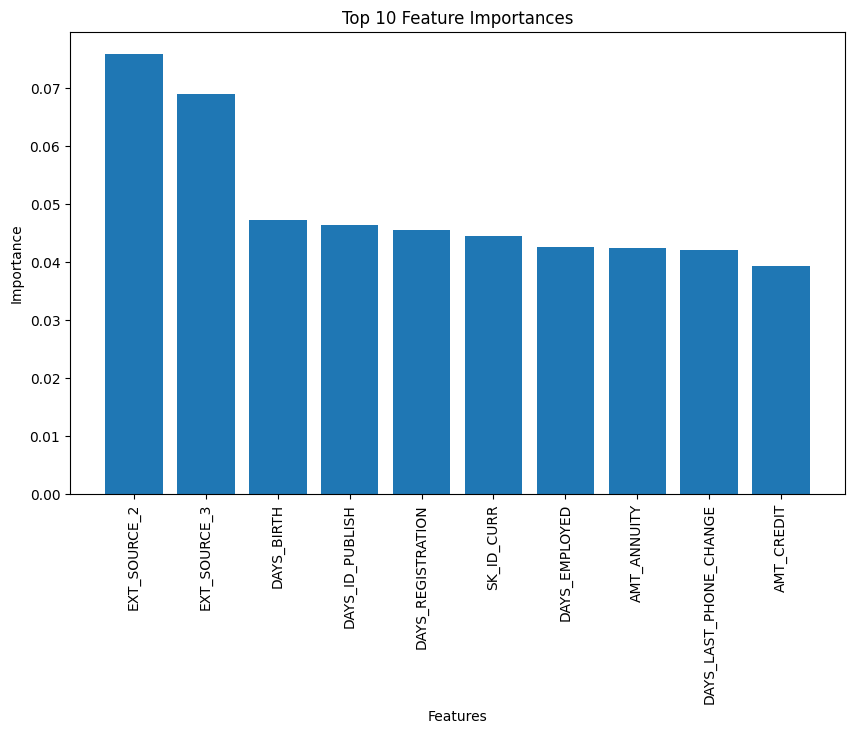

In [15]:
# Get the feature importances from scikit-learn model
importances_rf = model_sklearn_rf.feature_importances_

# Sort feature importances
sorted_indices = np.argsort(importances_rf)[::-1]
sorted_importances = importances_rf[sorted_indices]
sorted_features = X_train.columns[sorted_indices]

# Select top 10 features
top_features = sorted_features[:10]
top_importances = sorted_importances[:10]

# Plot feature importances for top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), top_importances, tick_label=top_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

# Create and train the model using scikit-learn
model_sklearn_lr = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')
model_sklearn_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

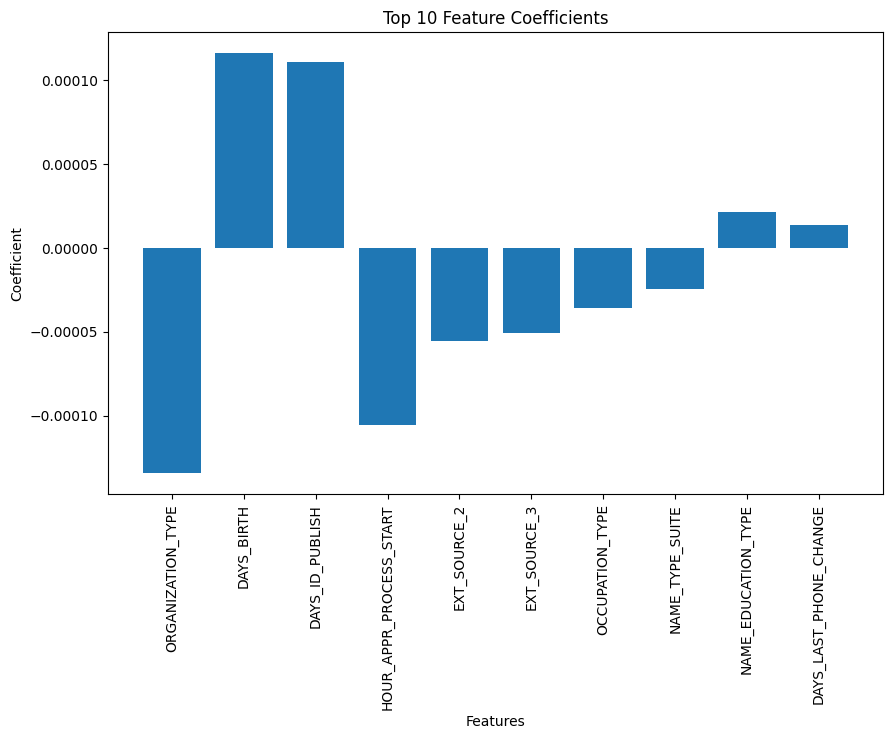

In [16]:
# Get the coefficients from the logistic regression model
coefficients = model_sklearn_lr.coef_[0]

# Sort the coefficients in descending order
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_features = X_train.columns[sorted_indices]

# Select top 10 features
top_features = sorted_features[:10]
top_coefficients = sorted_coefficients[:10]

# Plot feature coefficients for top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), top_coefficients, tick_label=top_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Top 10 Feature Coefficients')
plt.show()

# Prediction Data Testing

## Handling missing value

In [36]:
application_test.shape

(48744, 121)

In [39]:
application_train.shape

(307506, 81)

In [37]:
test_pd.shape

(48744, 92)

In [41]:
test_pd = test_pd[X_train.columns]

In [27]:
# Drop columns with missing values more than 50%
columns_to_drop = ['OWN_CAR_AGE', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE']

test_pd = application_test.drop(columns_to_drop, axis=1)

In [28]:
# Fill missing numeric values with the mean
numeric_cols = test_pd.select_dtypes(include=[np.number]).columns
test_pd[numeric_cols] = test_pd[numeric_cols].fillna(test_pd[numeric_cols].mean())

In [29]:
# Fill missing categorical values with a placeholder value
categorical_cols = test_pd.select_dtypes(include=['object']).columns
test_pd[categorical_cols] = test_pd[categorical_cols].fillna('Unknown')

In [30]:
missing_values = test_pd.isnull().sum()
for feature, count in missing_values.items():
    print(f"Feature: {feature}, Missing Values: {count}")

Feature: SK_ID_CURR, Missing Values: 0
Feature: NAME_CONTRACT_TYPE, Missing Values: 0
Feature: CODE_GENDER, Missing Values: 0
Feature: FLAG_OWN_CAR, Missing Values: 0
Feature: FLAG_OWN_REALTY, Missing Values: 0
Feature: CNT_CHILDREN, Missing Values: 0
Feature: AMT_INCOME_TOTAL, Missing Values: 0
Feature: AMT_CREDIT, Missing Values: 0
Feature: AMT_ANNUITY, Missing Values: 0
Feature: AMT_GOODS_PRICE, Missing Values: 0
Feature: NAME_TYPE_SUITE, Missing Values: 0
Feature: NAME_INCOME_TYPE, Missing Values: 0
Feature: NAME_EDUCATION_TYPE, Missing Values: 0
Feature: NAME_FAMILY_STATUS, Missing Values: 0
Feature: NAME_HOUSING_TYPE, Missing Values: 0
Feature: REGION_POPULATION_RELATIVE, Missing Values: 0
Feature: DAYS_BIRTH, Missing Values: 0
Feature: DAYS_EMPLOYED, Missing Values: 0
Feature: DAYS_REGISTRATION, Missing Values: 0
Feature: DAYS_ID_PUBLISH, Missing Values: 0
Feature: FLAG_MOBIL, Missing Values: 0
Feature: FLAG_EMP_PHONE, Missing Values: 0
Feature: FLAG_WORK_PHONE, Missing Values: 

## Encoding Features

**Categorical Features**

In [31]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = test_pd.select_dtypes(include=['object']).columns
for column in categorical_columns:
    test_pd[column] = test_pd[column].fillna('').astype('str')
    label_encoder = LabelEncoder()
    test_pd[column] = label_encoder.fit_transform(test_pd[column])

**Standarization**

In [32]:
from sklearn.preprocessing import StandardScaler

numeric_columns = test_pd.select_dtypes(include=['float']).columns
for column in numeric_columns:
    test_pd[column] = test_pd[column].fillna(0)
    scaler = StandardScaler()
    test_pd[column] = scaler.fit_transform(test_pd[column].values.reshape(-1, 1))

## Prediction with Logistic Regression

In [42]:
predict_lr=model_sklearn_lr.predict(test_pd)
print(predict_lr)

[0 0 0 ... 0 0 0]


In [44]:
submission_lr = pd.DataFrame({'SK_ID_CURR': test_pd['SK_ID_CURR'], 'TARGET': predict_lr})

In [46]:
submission_lr

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


In [47]:
# Save the submission DataFrame to a CSV file
submission_lr.to_csv('submission_lr.csv', index=False)

## Prediction with Random Forest

In [57]:
predict_rf=model_sklearn_rf.predict(test_pd)
print(predict_rv)

[0 0 0 ... 0 0 0]


In [58]:
submission_rf = pd.DataFrame({'SK_ID_CURR': test_pd['SK_ID_CURR'], 'TARGET': predict_rf})

In [59]:
submission_rf

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


In [60]:
# Save the submission DataFrame to a CSV file
submission_rv.to_csv('submission_rf.csv', index=False)